## Sivuaskel

Tässä tiedostossa on vain pari tökkäisyä dataan, eikä ole osa virallista kotitehtävä osuutta. Kuitenkin jätän näkyviin sillä ei varmaan haittaakaan ole jos joku törmää.

Halusin nähdä kuinka Suomessa sähkönkäyttö lisääntyy talvea kohti ja niinhän siinä kävi. Wau!

In [197]:
import pandas as pd

# muutetaan datetimet object -> datetime64 vaikka sillä ei tässä tiedostossa ole merkitystä
df = pd.read_csv("electricity_consumption_finland.csv", parse_dates=["startTime", "endTime"], sep= ";")

# print(df.head(3), df.tail(3))

print(df.isna().sum())
print(df.dtypes)
df.describe()


startTime                             0
endTime                               0
Electricity consumption in Finland    0
dtype: int64
startTime                             datetime64[ns, UTC]
endTime                               datetime64[ns, UTC]
Electricity consumption in Finland                float64
dtype: object


,Electricity consumption in Finland
count,31313.000000
mean,9021.767691
std,1417.034683
min,5731.940000
25%,8003.990000
50%,8748.640000
75%,10011.300000
max,13015.400000


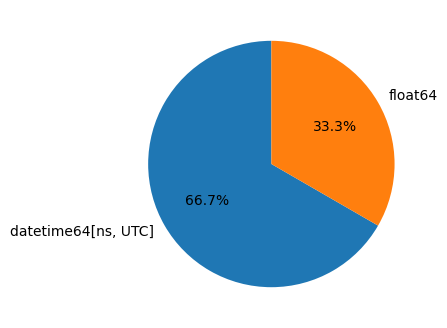

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fisku jako kun ei ole puuttuvia ja 2x datetime sarakkeet, 1x float (kulutus)

dtypes_pie = df.dtypes.value_counts()

plt.figure(figsize=(8, 4))
plt.title=("Tietotyyppien jakauma prosenteittain ennen muutoksia")

dtypes_pie.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    ylabel="",
)

plt.show()

In [199]:
df['month'] = pd.DatetimeIndex(df['startTime']).month


print(df.groupby("month").count())

# Helmikuulta ei ole yhtenäistä dataa saatavilla, ja kun tämä on vain "extrana" ja mielenkiinnosta tehty pikakatsaus dataan
# niin en täytä sitä. Tapoja olisi ollut monia kun vanhaa dataa, toki arviointi olisi ollut myös mahdollista esim keskiarvojen
# lämpötilojen avulla 

df = df[df['month'] != 2]
df["Electricity consumption in Finland"] *= 0.25

df2 = df.groupby("month")["Electricity consumption in Finland"].sum()
df2

       startTime  endTime  Electricity consumption in Finland
month                                                        
1           2768     2768                                2768
2              6        6                                   6
3           2657     2657                                2657
4           2809     2809                                2809
5           2884     2884                                2884
6           2872     2872                                2872
7           2973     2973                                2973
8           2972     2972                                2972
9           2845     2845                                2845
10          2861     2861                                2861
11          2702     2702                                2702
12          2964     2964                                2964


month
1     7.793739e+06
3     6.439747e+06
4     6.465981e+06
5     5.806837e+06
6     5.451717e+06
7     5.746912e+06
8     6.008169e+06
9     5.713255e+06
10    6.441818e+06
11    6.740310e+06
12    7.999985e+06
Name: Electricity consumption in Finland, dtype: float64

Ensin saadut arvot eivät kuitenkaan oleet ihan linjassa edellisvuosiin, esim:
https://www.fingrid.fi/ajankohtaista/tiedotteet/2023/sahkonkulutus-laski-helmikuussakin-viisi-prosenttia/

Tämä johtuu siitä että arvot ovat 15min aikana kulutettu MW keskiarvo tehossa, ei energiassa. Yksikkö muutos Energia = teho * aika eli kaikki varttitehokeskiarvot kun lisätään kuukaudelta yhteen, saadaan oikeassa mitassa kuukauden kulutus. 

Fingridin sivuilla yksiköksi ilmoitettiin MWh/h = MW.

https://data.fingrid.fi/en/datasets/124

C:\Users\Jere\AppData\Local\Temp\ipykernel_24796\2316581904.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= df2.index, y=df2, palette='tab10')


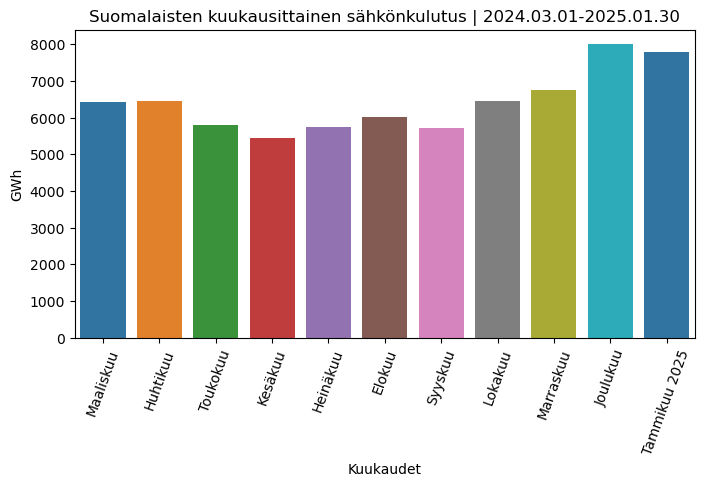

In [200]:
# Muunnetaan vielä yksikkö GWh niin saa vertailukerlmoista fingridin sivun kanssa
df2 /= 1000

# Siirretään 2025 tammi loppuun jotta saadaan aikajärjestys
df2 = df2.rename(index={1: 13})
df2 = df2.sort_index()

# selkeyden vuoksi
month_names = {
    3: "Maaliskuu",
    4: "Huhtikuu",
    5: "Toukokuu",
    6: "Kesäkuu",
    7: "Heinäkuu",
    8: "Elokuu",
    9: "Syyskuu",
    10: "Lokakuu",
    11: "Marraskuu",
    12: "Joulukuu",
    13: "Tammikuu 2025"
}

df2.index = df2.index.map(month_names)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x= df2.index, y=df2, palette='tab10')
ax.set_title("Suomalaisten kuukausittainen sähkönkulutus | 2024.03.01-2025.01.30")
plt.xlabel('Kuukaudet')
plt.ylabel('GWh')
plt.xticks(rotation=70)

plt.show()